In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\dlsat\Downloads\archive (11)\spam.csv",encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data = data.iloc[:,[0,1]]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.rename(columns={"v1":"target","v2":"SMS"},inplace=True)

C:\Users\dlsat\AppData\Local\Temp\ipykernel_12148\2394839264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"v1":"target","v2":"SMS"},inplace=True)


In [7]:
data.head()

,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [9]:
data['target'] = lb.fit_transform(data['target'])

C:\Users\dlsat\AppData\Local\Temp\ipykernel_12148\389018533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = lb.fit_transform(data['target'])


In [10]:
data['target'].unique()

array([0, 1])

In [11]:
data.head()

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.duplicated().sum()

403

In [13]:
data.drop_duplicates(keep="first",inplace=True)

C:\Users\dlsat\AppData\Local\Temp\ipykernel_12148\797715335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep="first",inplace=True)


In [14]:
data.duplicated().sum()

0

In [15]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

C:\Users\dlsat\AppData\Local\Temp\ipykernel_12148\813864989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='target',data = data,palette='hls')


<Axes: xlabel='target', ylabel='count'>

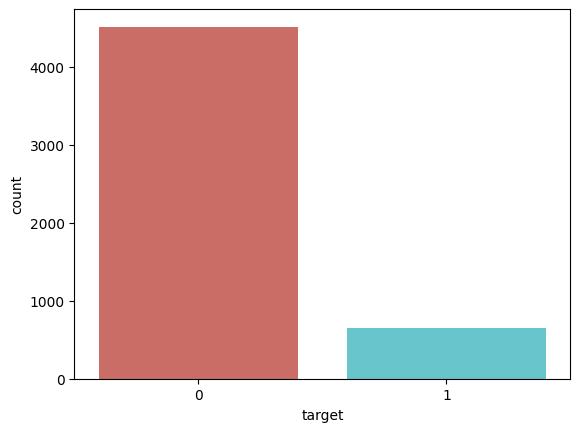

In [16]:
import seaborn as sb
sb.countplot(x='target',data = data,palette='hls')

In [17]:
x = data['SMS']
y = data['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [20]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_ = tfidf.fit_transform(x_train)

x_test_ = tfidf.transform(x_test)

In [21]:
nb = MultinomialNB()
nb.fit(x_train_, y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_test = nb.predict(x_test_)


In [23]:


# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.971953578336557
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [24]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [25]:
model = SVC()

model.fit(x_train_, y_train)

SVC()

In [26]:
model.score(x_test_, y_test)

0.9806576402321083

In [27]:
y_pred = model.predict(x_test_)

In [28]:
f1_score(y_test, y_pred)

0.9264705882352942

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs",max_iter=400,random_state=42)
lr.fit(x_train_, y_train)

LogisticRegression(max_iter=400, random_state=42)

In [31]:
y_pred2=lr.predict(x_test_)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred2)
confusion_matrix

array([[887,   2],
       [ 33, 112]], dtype=int64)

In [33]:
score=accuracy_score(y_test,y_pred2)
print("accuracy_score using logistic regression:",score)

accuracy_score using logistic regression: 0.9661508704061895
